In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

## Company Data

In [2]:
company_data=pd.read_csv("Company_Data.csv")

# EDA & Data Cleaning

In [3]:
company_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
# Dealing with Categorical Columns for independent variables
company_data=pd.get_dummies(company_data,columns=["Urban","US","ShelveLoc"],drop_first=True)

In [6]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban_Yes,US_Yes,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,1,1,0,0
1,11.22,111,48,16,260,83,65,10,1,1,1,0
2,10.06,113,35,10,269,80,59,12,1,1,0,1
3,7.40,117,100,4,466,97,55,14,1,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1,1,0
396,6.14,139,23,3,37,120,55,11,0,1,0,1
397,7.41,162,26,12,368,159,40,18,1,1,0,1
398,5.94,100,79,7,284,95,50,12,1,1,0,0


### Train Test Split


In [7]:
x=company_data.drop(columns=["Sales"])
y=company_data["Sales"]

In [8]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.8,random_state=42)

In [9]:
y_train.unique()

array([ 7.4 , 13.91,  4.1 ,  9.16,  7.22,  8.47,  5.36,  7.41,  3.47,
        5.33,  8.65,  6.18,  7.57, 10.59,  4.94,  7.72,  5.58,  9.64,
        3.89,  8.55,  5.04,  9.  ,  7.58,  8.85,  5.93, 11.85,  8.73,
        6.52,  7.02,  9.32,  6.5 ,  8.67, 11.82,  5.32,  3.07,  8.32,
        9.14,  7.6 ,  8.03, 11.19, 10.21,  8.98, 12.29,  6.88, 10.14,
        7.54, 10.44,  5.74,  6.71, 10.  ,  6.15,  8.77, 10.48,  7.37,
        7.23,  5.31,  9.7 ,  5.9 ,  8.89, 12.3 ,  6.64,  7.71,  6.97,
        5.21,  6.62,  0.37, 10.26,  6.63,  5.87,  6.67, 10.49,  9.01,
        7.56,  5.07,  7.52, 15.63,  5.94,  7.9 ,  7.78,  7.53,  7.3 ,
        9.45,  7.95,  6.81,  5.68, 10.51,  5.4 ,  4.53,  7.99,  8.19,
        9.48,  0.53,  4.69,  7.45,  7.36, 13.39,  4.95,  9.09,  4.74,
        3.62,  2.66, 10.62,  6.41,  4.19,  9.34,  3.9 ,  9.08,  8.7 ,
        5.17,  7.5 ,  8.61,  5.3 ,  7.63,  5.28,  2.05,  9.39,  7.74,
        4.47,  6.59, 11.96, 11.7 , 10.07,  7.49,  6.23,  9.4 ,  8.8 ,
       10.71,  7.8 ,

# Model building

In [10]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [11]:
cv=KFold(n_splits=10)
modelll=RandomForestRegressor(n_estimators=100,random_state=42)
scores=cross_val_score(model,x_train,y_train,cv=cv)


In [12]:
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [13]:
scores

array([0.70288714, 0.50860308, 0.65589372, 0.72081127, 0.49033179,
       0.68492143, 0.57224803, 0.65939541, 0.65603667, 0.7513011 ])

In [14]:
scores.mean()

0.6402429641335249

# Hyperparameter tuning

In [15]:
n_estimators = list(range(1,200))
criterion=["squared_error", "absolute_error", "poisson"]
parameters = {"criterion" : criterion, "n_estimators" : n_estimators}

model = RandomForestRegressor()
grid = GridSearchCV(estimator = model, param_grid = parameters)
grid.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [16]:
print(grid.best_score_)
print(grid.best_params_)

0.6175260655803496
{'criterion': 'squared_error', 'n_estimators': 48}


In [17]:
model = RandomForestRegressor(criterion= 'squared_error', n_estimators=124, random_state=0)
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=124, random_state=0)

In [18]:
feature_scores = pd.Series(model.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores

Price               0.319735
ShelveLoc_Good      0.201422
Age                 0.113014
CompPrice           0.094101
Advertising         0.081654
ShelveLoc_Medium    0.059064
Income              0.050358
Population          0.034289
Education           0.032468
US_Yes              0.007244
Urban_Yes           0.006652
dtype: float64

# Visualize feature scores of the features

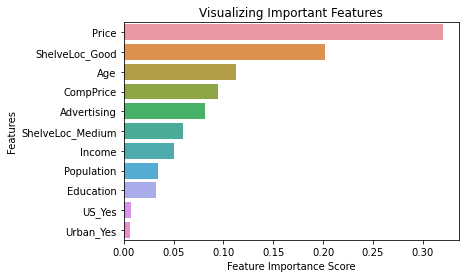

In [19]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


In [20]:
y_pred=model.predict(x_test)
mean_absolute_error(y_test,y_pred)

1.4094294354838701